In [ ]:
# from geometries import survey_polygon
from utils.figures import *
import os
import pandas as pd

In [42]:
# Read in and merge all data in the merged folder
merged_folder = "../../data/labels/labeled_surveys/random_sample/merged"
files = os.listdir(merged_folder)

# Assuming the files are CSVs, read and merge them into a single DataFrame
full_df = pd.concat([pd.read_csv(os.path.join(merged_folder, file)) for file in files if file.endswith('.csv')], ignore_index=True)

In [43]:
full_df[:4]

,site_id,internal_id,plot_file,operator,operator_initials,x,y,water_source,image_number,year,month,day,irrigation,percent_coverage,percent_coverage_high_certainty,poly_avg_size,poly_avg_size_high_certainty,source_file
0,id_5170792,8,Zambia_0.05_n_225-249.csv,NaN,DSB,23.460475,-15.076142,False,1,2019,7,10,1,0.0,0.0,NaN,NaN,DSB_225-249
1,id_5154963,9,Zambia_0.05_n_225-249.csv,NaN,DSB,27.607460,-14.696160,False,1,2018,8,29,1,0.0,0.0,NaN,NaN,DSB_225-249
2,id_5154963,9,Zambia_0.05_n_225-249.csv,NaN,DSB,27.607460,-14.696160,False,2,2018,8,26,1,0.0,0.0,NaN,NaN,DSB_225-249
3,id_5154963,9,Zambia_0.05_n_225-249.csv,NaN,DSB,27.607460,-14.696160,False,3,2017,9,11,1,0.0,0.0,NaN,NaN,DSB_225-249


In [78]:
def get_stats(df):

    stats = {}

    # Number of 25 location surveys done including repeats
    stats["num_surveys_incl_repeats"] = (df['source_file']).nunique()
    stats["num_location_incl_repeats"] = stats["num_surveys_incl_repeats"] * 25

    # Number of unique 25 location surveys done 
    stats["num_unique_surveys"] = df['plot_file'].nunique()
    stats["num_location_unique"] = stats["num_unique_surveys"] * 25

    # Number of unique images found including repeats
    stats["num_images_incl_repeats"] = df.shape[0]

    # Number of unique images found without repeats
    stats["num_unique_images"] = (df['site_id'] + df['year'].astype(str) + df['month'].astype(str) + df['day'].astype(str)).nunique()

    # Number of unique locations labeled
    stats["num_unique_locations_with_images"] = len(df['site_id'].unique())

    # Number of images found that have irrigation in them (certainty >= 4)
    stats["num_irrigation_images"] = df[df["irrigation"] >= 4].shape[0]

    # Faction locations with any images
    stats["fraction_locations_with_images"] = stats["num_unique_locations_with_images"] / stats["num_location_unique"]

    # Fraction of images with irrigation
    stats["fraction_irrigation_images"] = stats["num_irrigation_images"] / stats["num_unique_images"]

    # Fraction of locations with irrigation in any image
    stats["fraction_irrigation_locations"] = df[df["irrigation"] >= 4]['site_id'].nunique() / stats["num_unique_locations_with_images"]

    # Average area covered by irrigation (all certainties)
    stats["pct_irr_cov"] = df["percent_coverage"].mean()
    stats["pct_irr_cov_certain"] = df["percent_coverage_high_certainty"].mean()

    # Same but only for images where any irrigation is found
    stats["pct_irr_cov_irrigated_ims"] = df[df["irrigation"] >= 4]["percent_coverage"].mean()
    stats["pct_irr_cov_irrigated_ims_certain"] = df[df["irrigation"] >= 4]["percent_coverage_high_certainty"].mean()

    return stats

In [79]:
get_stats(full_df)

{'num_surveys_incl_repeats': 19,
 'num_location_incl_repeats': 475,
 'num_unique_surveys': 9,
 'num_location_unique': 225,
 'num_images_incl_repeats': 1031,
 'num_unique_images': 501,
 'num_unique_locations_with_images': 203,
 'num_irrigation_images': 201,
 'fraction_locations_with_images': 0.9022222222222223,
 'fraction_irrigation_images': 0.40119760479041916,
 'fraction_irrigation_locations': 0.3891625615763547,
 'pct_irr_cov': np.float64(0.3133935706283336),
 'pct_irr_cov_certain': np.float64(0.1891320143594117),
 'pct_irr_cov_irrigated_ims': np.float64(1.18282029992216),
 'pct_irr_cov_irrigated_ims_certain': np.float64(0.9521386678024085)}

In [80]:
get_stats(full_df[full_df["operator_initials"] == "AB"])

{'num_surveys_incl_repeats': 1,
 'num_location_incl_repeats': 25,
 'num_unique_surveys': 1,
 'num_location_unique': 25,
 'num_images_incl_repeats': 51,
 'num_unique_images': 51,
 'num_unique_locations_with_images': 21,
 'num_irrigation_images': 13,
 'fraction_locations_with_images': 0.84,
 'fraction_irrigation_images': 0.2549019607843137,
 'fraction_irrigation_locations': 0.38095238095238093,
 'pct_irr_cov': np.float64(0.04184111481168116),
 'pct_irr_cov_certain': np.float64(0.028665655627163666),
 'pct_irr_cov_irrigated_ims': np.float64(0.13759066931538813),
 'pct_irr_cov_irrigated_ims_certain': np.float64(0.11245757207579593)}

In [81]:
# Only keep if the survey has been corrected and is 101-125
get_stats(full_df[full_df["source_file"].str.match(r'^[a-zA-Z]*_[a-zA-Z]*_101-125')])

{'num_surveys_incl_repeats': 4,
 'num_location_incl_repeats': 100,
 'num_unique_surveys': 1,
 'num_location_unique': 25,
 'num_images_incl_repeats': 201,
 'num_unique_images': 54,
 'num_unique_locations_with_images': 22,
 'num_irrigation_images': 39,
 'fraction_locations_with_images': 0.88,
 'fraction_irrigation_images': 0.7222222222222222,
 'fraction_irrigation_locations': 0.36363636363636365,
 'pct_irr_cov': np.float64(0.0863521780730527),
 'pct_irr_cov_certain': np.float64(0.02797846575522391),
 'pct_irr_cov_irrigated_ims': np.float64(0.13949566106838218),
 'pct_irr_cov_irrigated_ims_certain': np.float64(0.06933136976286595)}

In [82]:
# Only keep if the source file has shows a survey that's been corrected (i.e. name format starts with initials_initials not initials_number)
get_stats(full_df[full_df["source_file"].str.match(r'^[a-zA-Z]*_[a-zA-Z]*')])

{'num_surveys_incl_repeats': 19,
 'num_location_incl_repeats': 475,
 'num_unique_surveys': 9,
 'num_location_unique': 225,
 'num_images_incl_repeats': 1031,
 'num_unique_images': 501,
 'num_unique_locations_with_images': 203,
 'num_irrigation_images': 201,
 'fraction_locations_with_images': 0.9022222222222223,
 'fraction_irrigation_images': 0.40119760479041916,
 'fraction_irrigation_locations': 0.3891625615763547,
 'pct_irr_cov': np.float64(0.3133935706283336),
 'pct_irr_cov_certain': np.float64(0.1891320143594117),
 'pct_irr_cov_irrigated_ims': np.float64(1.18282029992216),
 'pct_irr_cov_irrigated_ims_certain': np.float64(0.9521386678024085)}

In [84]:
corrected_101 = full_df[full_df["source_file"].str.match(r'^[a-zA-Z]*_[a-zA-Z]*_101-125')]

In [ ]:
# I want to compare what different people found for the corrected 101-125 surveys

# # Did people agree on whether there was irrigation or not for a given image? 
# # Did people find similar amounts of irrigation 

/var/folders/1f/_ptk0jz93h39qj25crwwtb0w0000gn/T/ipykernel_50354/2525861864.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
/var/folders/1f/_ptk0jz93h39qj25crwwtb0w0000gn/T/ipykernel_50354/2525861864.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image'] = df['site_id'] + '_' + df['date'].dt.strftime('%Y-%m-%d')


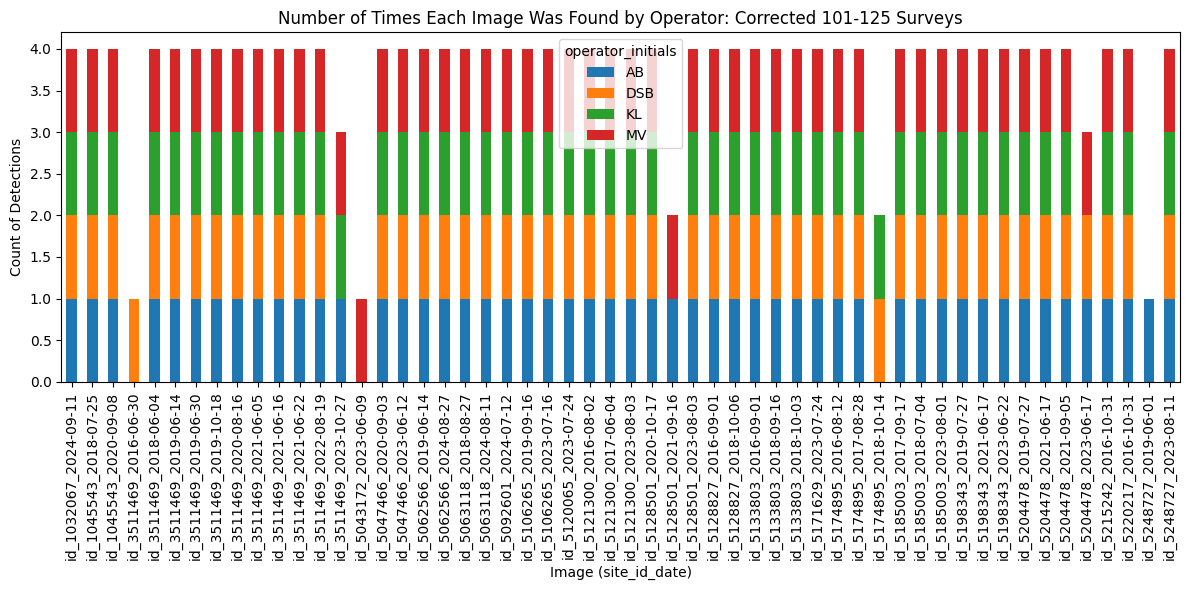

In [92]:
def plot_image_counts(df, df_description):
    """
    Plot the number of times each image was found by each operator.
    """

    # Combine date components and site ID into a single image identifier
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df['image'] = df['site_id'] + '_' + df['date'].dt.strftime('%Y-%m-%d')

    # Count occurrences per image and operator
    grouped = df.groupby(['image', 'operator_initials']).size().unstack(fill_value=0)

    # Plot a stacked bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    grouped.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('Image (site_id_date)')
    ax.set_ylabel('Count of Detections')
    ax.set_title('Number of Times Each Image Was Found by Operator: ' + df_description)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_image_counts(corrected_101, "Corrected 101-125 Surveys")

/var/folders/1f/_ptk0jz93h39qj25crwwtb0w0000gn/T/ipykernel_50354/924509338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df[['year','month','day']])
/var/folders/1f/_ptk0jz93h39qj25crwwtb0w0000gn/T/ipykernel_50354/924509338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image'] = df['site_id'] + '_' + df['date'].dt.strftime('%Y-%m-%d')


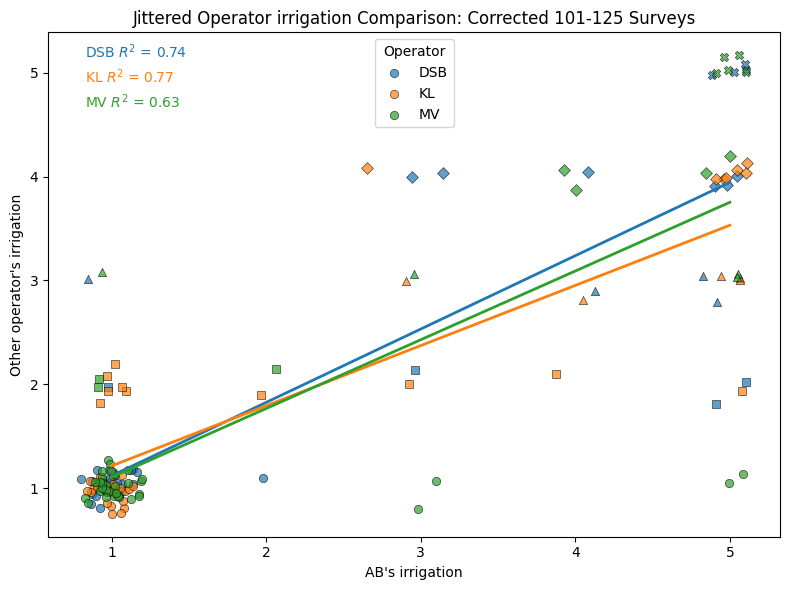

/var/folders/1f/_ptk0jz93h39qj25crwwtb0w0000gn/T/ipykernel_50354/924509338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df[['year','month','day']])
/var/folders/1f/_ptk0jz93h39qj25crwwtb0w0000gn/T/ipykernel_50354/924509338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image'] = df['site_id'] + '_' + df['date'].dt.strftime('%Y-%m-%d')


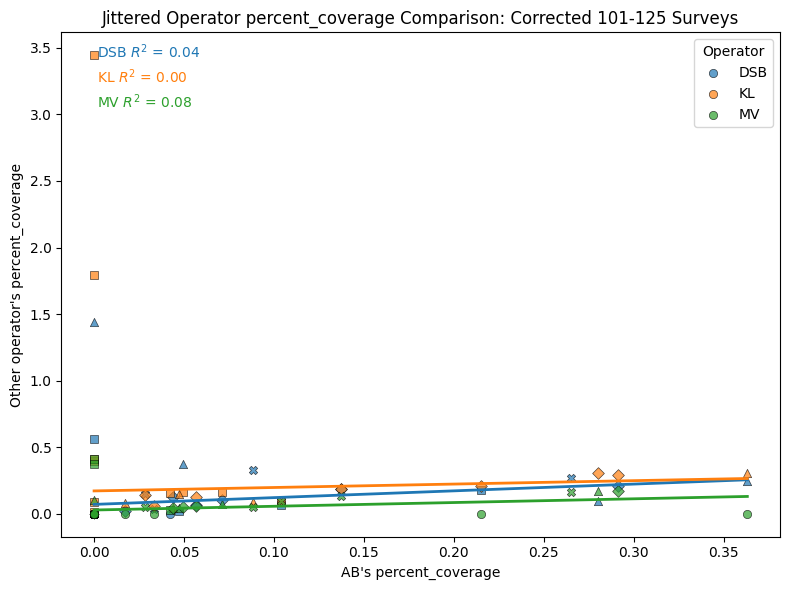

/var/folders/1f/_ptk0jz93h39qj25crwwtb0w0000gn/T/ipykernel_50354/924509338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df[['year','month','day']])
/var/folders/1f/_ptk0jz93h39qj25crwwtb0w0000gn/T/ipykernel_50354/924509338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image'] = df['site_id'] + '_' + df['date'].dt.strftime('%Y-%m-%d')


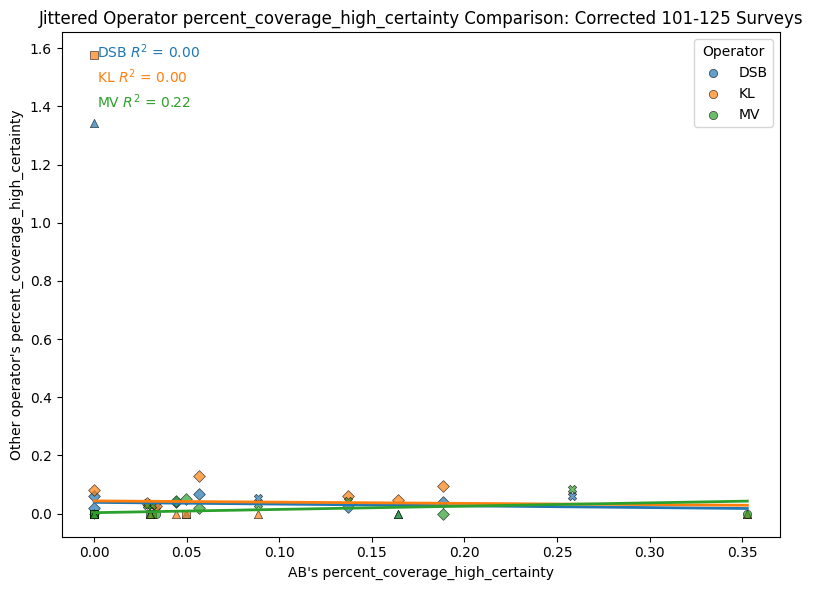

In [109]:
def compare_to_AB(df, df_description, column, jitter=False):
    # Prepare image identifier
    df['date'] = pd.to_datetime(df[['year','month','day']])
    df['image'] = df['site_id'] + '_' + df['date'].dt.strftime('%Y-%m-%d')

    # Pivot to get the target column by operator
    pivot = df.pivot(index='image', columns='operator_initials', values=column)
    # Pivot to get the irrigation ratings by operator
    pivot_irr = df.pivot(index='image', columns='operator_initials', values='irrigation')

    # Identify all operators except AB
    operators = [op for op in pivot.columns if op != 'AB']

    # Assign each operator a distinct color automatically
    cmap = plt.get_cmap('tab10')
    colors = {op: cmap(i % 10) for i, op in enumerate(operators)}

    # Define marker shapes for the other operator’s irrigation rating
    shapes = {
        1: 'o',   # circle
        2: 's',   # square
        3: '^',   # triangle-up
        4: 'D',   # diamond
        5: 'X'    # X
    }

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    for i, op in enumerate(operators):
        data = pivot[['AB', op]].dropna()
        col = colors[op]

        # jitter if requested
        if jitter:
            jitter_x = np.random.normal(0, 0.1, size=len(data))
            jitter_y = np.random.normal(0, 0.1, size=len(data))
        else:
            jitter_x = np.zeros(len(data))
            jitter_y = np.zeros(len(data))

        # get the OTHER operator's irrigation rating for each point
        irr_op = pivot_irr.loc[data.index, op].astype(int)

        # scatter by other-operator rating → shape, and color by operator
        for rating in sorted(irr_op.unique()):
            mask = (irr_op == rating)
            ax.scatter(
                data['AB'][mask] + jitter_x[mask],
                data[op][mask] + jitter_y[mask],
                marker=shapes[rating],
                color=col,
                label=op if rating == sorted(irr_op.unique())[0] else None,
                alpha=0.7,
                edgecolor='k',
                linewidth=0.5
            )

        # fit and draw trend line in the same color
        m, b = np.polyfit(data['AB'], data[op], 1)
        x_vals = np.array([data['AB'].min(), data['AB'].max()])
        y_vals = m * x_vals + b
        ax.plot(x_vals, y_vals, color=col, linewidth=2)

        # compute and annotate R²
        y_pred = m * data['AB'] + b
        ss_res = ((data[op] - y_pred) ** 2).sum()
        ss_tot = ((data[op] - data[op].mean()) ** 2).sum()
        r2 = 1 - ss_res / ss_tot
        ax.text(
            0.05, 0.95 - i * 0.05,
            f"{op} $R^2$ = {r2:.2f}",
            transform=ax.transAxes,
            color=col,
            fontsize=10
        )

    ax.set_xlabel("AB's " + column)
    ax.set_ylabel("Other operator's " + column)
    ax.set_title("Jittered Operator " + column + " Comparison: " + df_description)
    ax.legend(title='Operator')
    plt.tight_layout()
    plt.show()



compare_to_AB(corrected_101, "Corrected 101-125 Surveys", "irrigation", jitter=True)
compare_to_AB(corrected_101, "Corrected 101-125 Surveys", "percent_coverage")
compare_to_AB(corrected_101, "Corrected 101-125 Surveys", "percent_coverage_high_certainty")

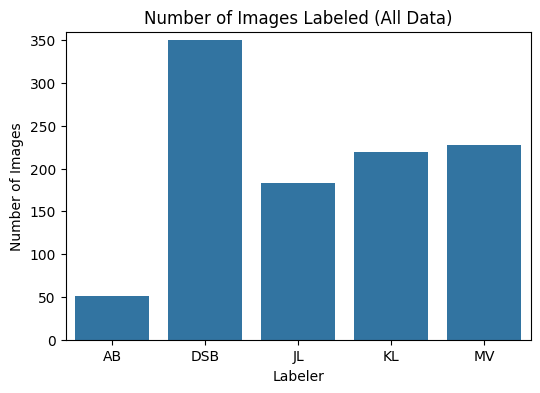

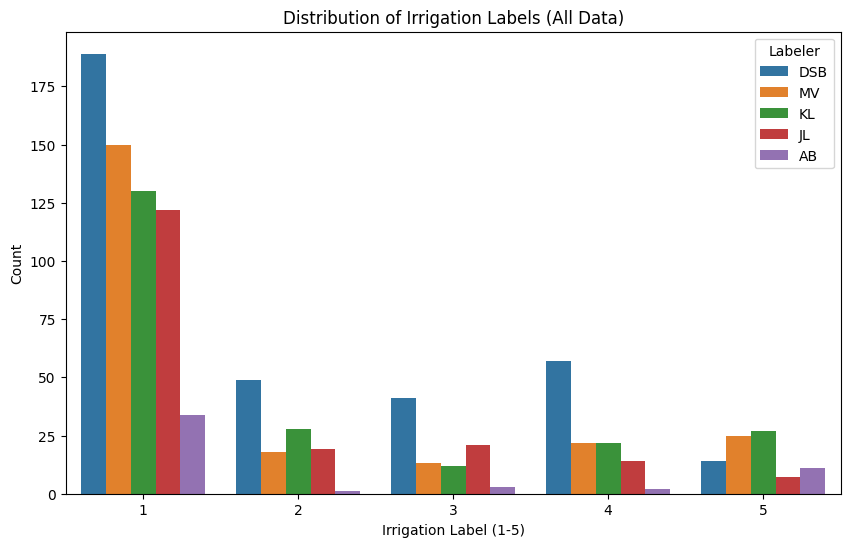

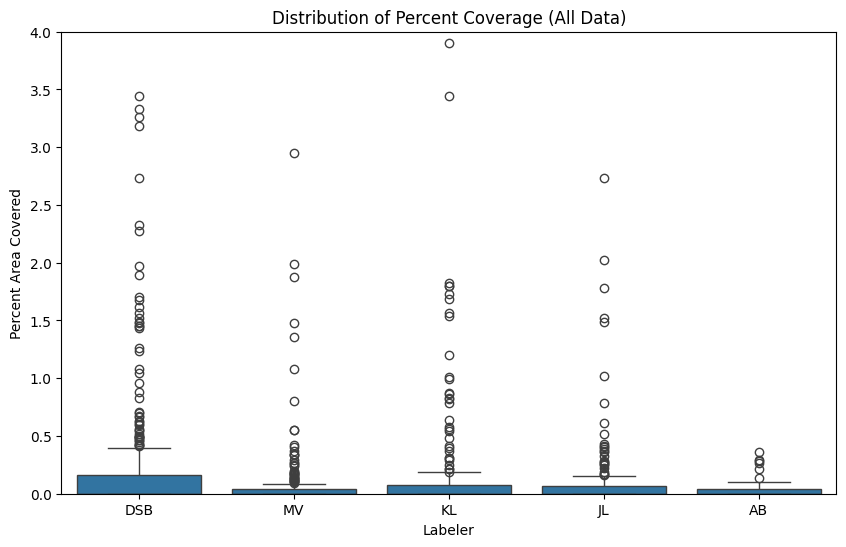

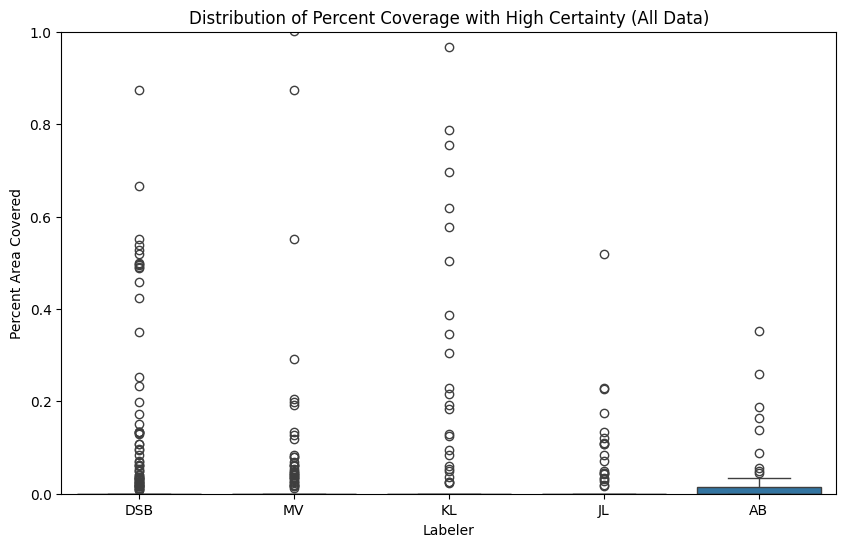

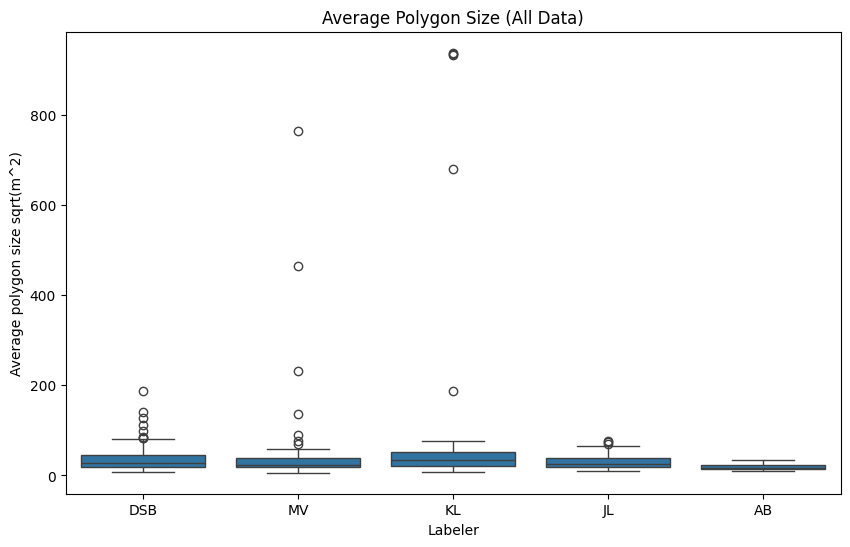

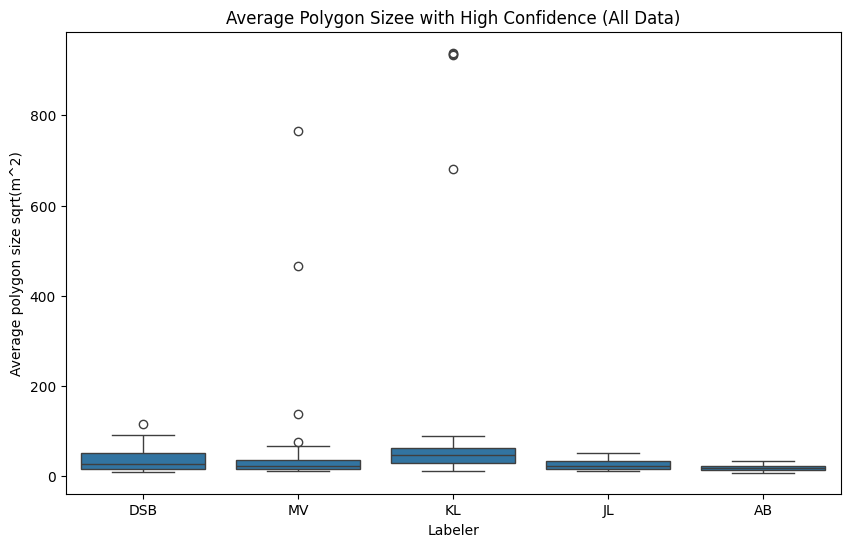

In [83]:
# Full dataset (all locations)
plot_num_images(full_df, "Number of Images Labeled (All Data)")
plot_irrigation_distribution(full_df, "Distribution of Irrigation Labels (All Data)")
plot_percent_coverage(full_df, "Distribution of Percent Coverage (All Data)", certain_only=False, ymax=4)
plot_percent_coverage(full_df, "Distribution of Percent Coverage with High Certainty (All Data)", certain_only=True, ymax=1)
plot_avg_polygon_size(full_df, "Average Polygon Size (All Data)", certain_only=False)
plot_avg_polygon_size(full_df, "Average Polygon Sizee with High Confidence (All Data)", certain_only=True)


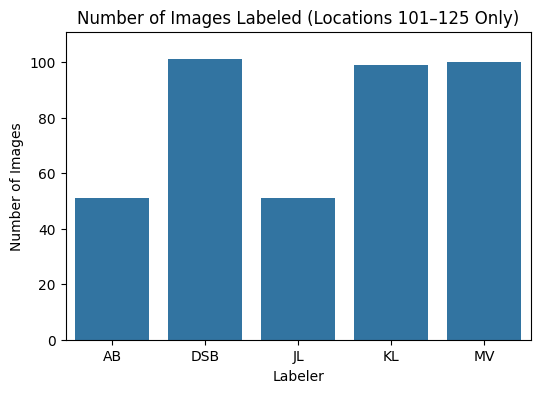

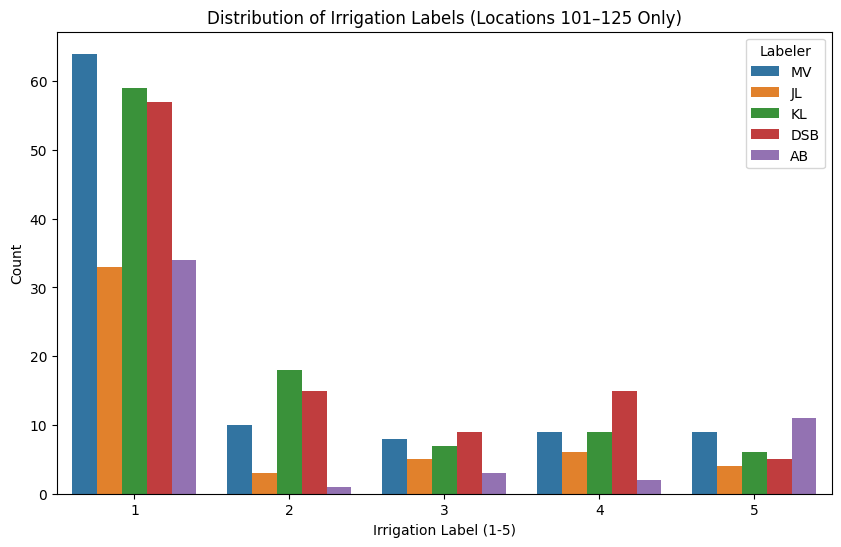

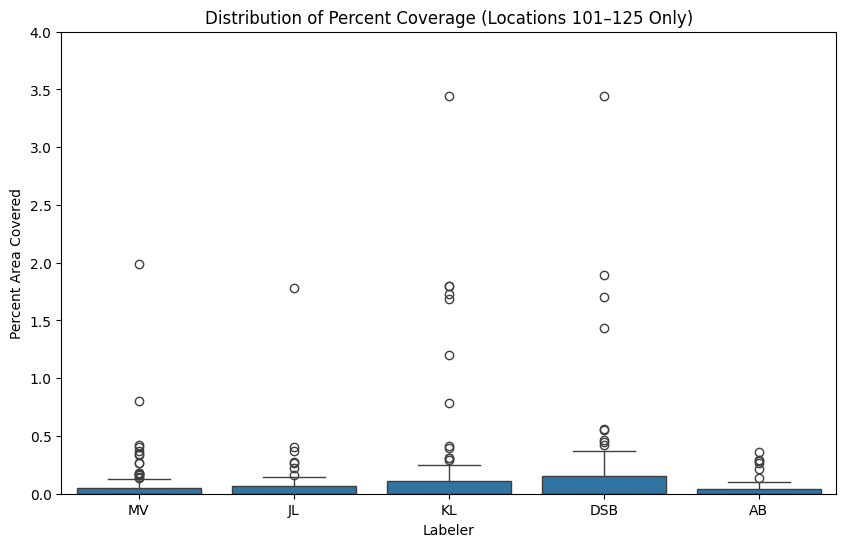

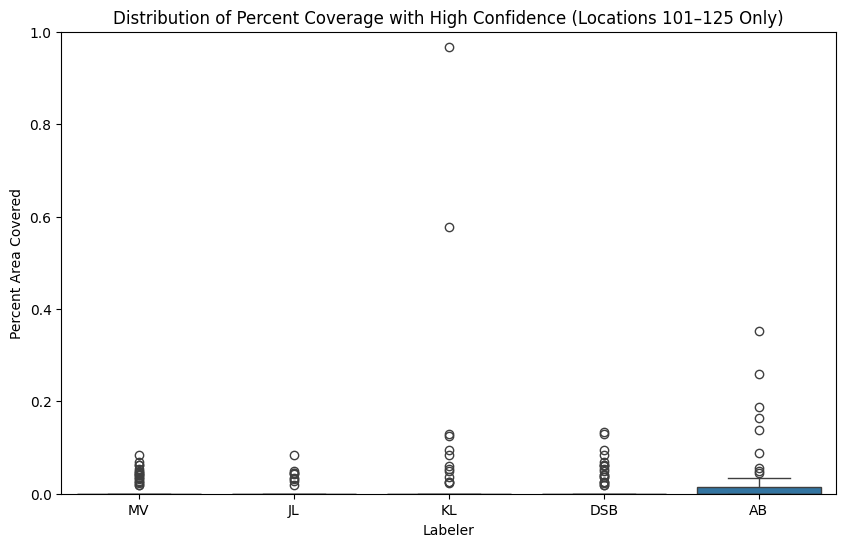

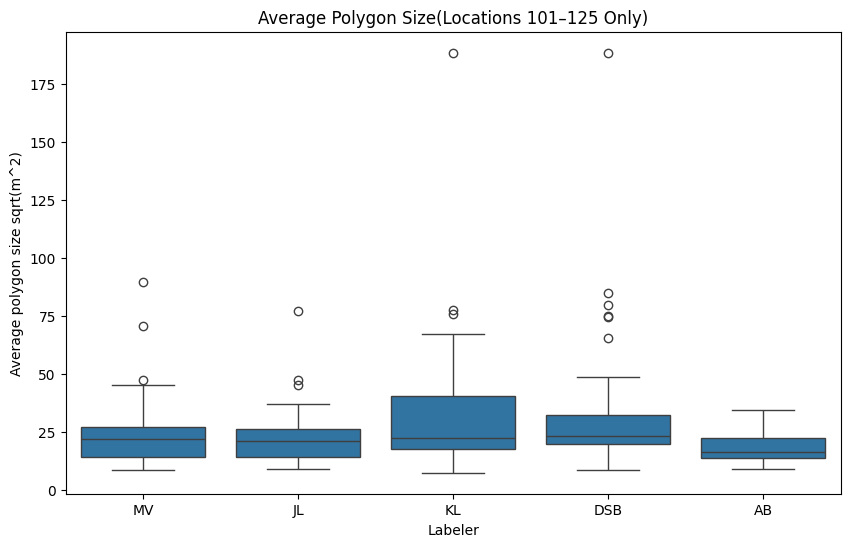

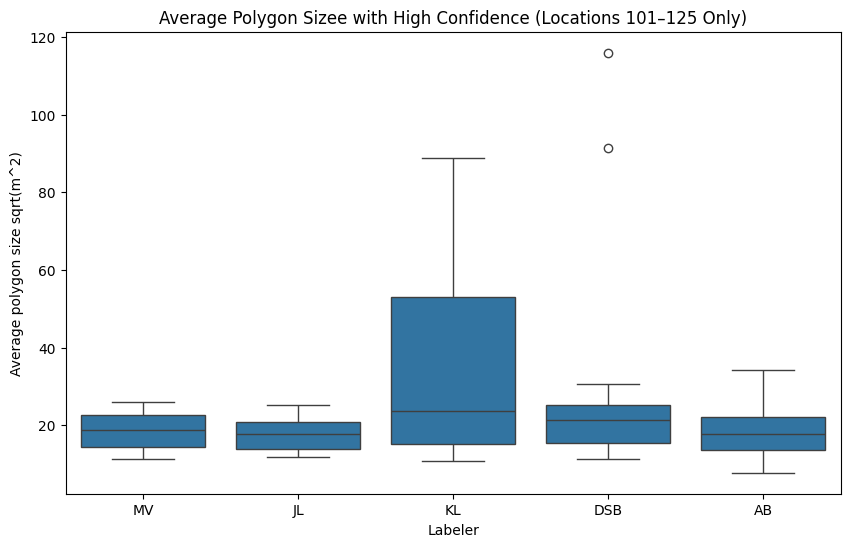

In [5]:
subset_df = full_df[full_df['plot_file'] == "Zambia_0.05_n_101-125.csv"]

# 101-125 subset
plot_num_images(subset_df, "Number of Images Labeled (Locations 101–125 Only)")
plot_irrigation_distribution(subset_df, "Distribution of Irrigation Labels (Locations 101–125 Only)")
plot_percent_coverage(subset_df, "Distribution of Percent Coverage (Locations 101–125 Only)", certain_only=False, ymax=4)
plot_percent_coverage(subset_df, "Distribution of Percent Coverage with High Confidence (Locations 101–125 Only)", certain_only=True, ymax=1)
plot_avg_polygon_size(subset_df, "Average Polygon Size(Locations 101–125 Only)", certain_only=False)
plot_avg_polygon_size(subset_df, "Average Polygon Sizee with High Confidence (Locations 101–125 Only)", certain_only=True)